<a href="https://colab.research.google.com/github/zjzsu2000/CMPE258/blob/master/assignment5/f)_Stock_market_prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optional Graded assignment 5
# f) Stock market prediction using LSTM

In [0]:
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential
import time
import warnings
import numpy as np
from numpy import newaxis
import matplotlib.pyplot as plt

In [0]:
def load_data(filename, seq_len, normalise_window):
    f = open(filename, 'r').read()
    data = f.split('\n')
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    
    if normalise_window:
        result = normalise_windows(result)

    result = np.array(result)

    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    np.random.shuffle(train)
    x_train = train[:, :-1]
    y_train = train[:, -1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  

    return [x_train, y_train, x_test, y_test]

def normalise_windows(window_data):
    normalised_data = []
    for window in window_data:
        normalised_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalised_data.append(normalised_window)
    return normalised_data

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
root_dir = '/content/drive/My Drive/'
base_dir = root_dir + 'CMPE258/assignment/'
data_dir_me=base_dir+'data/'

In [0]:
X_train, y_train, X_test, y_test = load_data(data_dir_me+'sp500.csv', 50, True)

In [23]:
model = Sequential([LSTM(return_sequences=True, input_shape=(None, 1), units=50),
                    Dropout(0.2),
                    LSTM(input_shape=(None, 1), return_sequences=True, units=50),
                    LSTM(100, return_sequences=False),
                    Dropout(0.2),Dense(units=1),
                    Activation('linear')])

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print('compilation time : ', time.time() - start)

compilation time :  0.008912801742553711


In [24]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, None, 50)          10400     
_________________________________________________________________
dropout_11 (Dropout)         (None, None, 50)          0         
_________________________________________________________________
lstm_15 (LSTM)               (None, None, 50)          20200     
_________________________________________________________________
lstm_16 (LSTM)               (None, 100)               60400     
_________________________________________________________________
dropout_12 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
_________________________________________________________________
activation_6 (Activation)    (None, 1)                

In [62]:
#Step 3 Train the model
model.fit(X_train,y_train,batch_size=512,epochs=1,validation_split=0.05)

Train on 3523 samples, validate on 186 samples
Epoch 1/1
3523/3523 [==============================] - 3s 933us/step - loss: 2.6294e-04 - val_loss: 1.7486e-04


In [0]:
def predict_sequences_multiple(model, data, window_size, prediction_len):   
    prediction_seqs = []
    for i in range(int(len(data)/prediction_len)):
        curr_frame = data[i*prediction_len]
        predicted = []
        for j in range(0,prediction_len):
            predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
            curr_frame = curr_frame[1:]
            curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
        prediction_seqs.append(predicted)
    return prediction_seqs

In [0]:
predictions = predict_sequences_multiple(model, X_test, 50, 50)

In [0]:
def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
        plt.legend()
    plt.show()

In [56]:
predictions

[[0.079611234,
  0.080553055,
  0.08150719,
  0.082546994,
  0.08371138,
  0.08501281,
  0.08644435,
  0.08799327,
  0.0896396,
  0.09136371,
  0.09314627,
  0.09497212,
  0.09682803,
  0.098703586,
  0.100591846,
  0.10248712,
  0.10438723,
  0.106288746,
  0.10819044,
  0.11009189,
  0.111992,
  0.113891155,
  0.11578887,
  0.11768493,
  0.119580045,
  0.12147422,
  0.12336698,
  0.12525848,
  0.12714879,
  0.12903775,
  0.13092542,
  0.13281177,
  0.13469656,
  0.13657986,
  0.13846134,
  0.14034086,
  0.1422186,
  0.14409438,
  0.14596778,
  0.14783895,
  0.14970808,
  0.15157473,
  0.15343906,
  0.15530106,
  0.15716006,
  0.15901601,
  0.16086921,
  0.1627194,
  0.16456674,
  0.16641085],
 [0.03570718,
  0.037824735,
  0.039943986,
  0.042041186,
  0.04410503,
  0.04613073,
  0.048120223,
  0.050079234,
  0.052013367,
  0.053928412,
  0.05582952,
  0.057720896,
  0.059606083,
  0.06148805,
  0.063368864,
  0.06524919,
  0.06713081,
  0.06901357,
  0.07089677,
  0.07278051,
  0.07

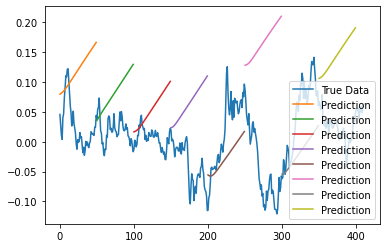

In [67]:
plot_results_multiple(predictions, y_test, 50)

In [61]:
model.fit(X_train,y_train,batch_size=128,epochs=20,validation_split=0.05)

Train on 3523 samples, validate on 186 samples
Epoch 1/20
3523/3523 [==============================] - 6s 2ms/step - loss: 6.3854e-04 - val_loss: 4.9037e-04
Epoch 2/20
3523/3523 [==============================] - 6s 2ms/step - loss: 5.7233e-04 - val_loss: 4.2217e-04
Epoch 3/20
3523/3523 [==============================] - 6s 2ms/step - loss: 5.0924e-04 - val_loss: 4.0099e-04
Epoch 4/20
3523/3523 [==============================] - 6s 2ms/step - loss: 4.7745e-04 - val_loss: 4.0220e-04
Epoch 5/20
3523/3523 [==============================] - 6s 2ms/step - loss: 4.4244e-04 - val_loss: 3.2620e-04
Epoch 6/20
3523/3523 [==============================] - 6s 2ms/step - loss: 4.2320e-04 - val_loss: 2.9454e-04
Epoch 7/20
3523/3523 [==============================] - 6s 2ms/step - loss: 3.8585e-04 - val_loss: 2.6123e-04
Epoch 8/20
3523/3523 [==============================] - 5s 2ms/step - loss: 3.4683e-04 - val_loss: 2.3134e-04
Epoch 9/20
3523/3523 [==============================] - 6s 2ms/step - los

In [0]:
predictions2 = predict_sequences_multiple(model, X_test, 50, 50)

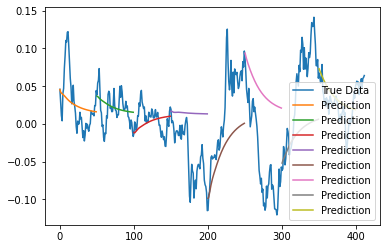

In [69]:
plot_results_multiple(predictions2, y_test, 50)

In [0]:
def predict_point_by_point(model, data):
    #Predict each timestep given the last sequence of true data, in effect only predicting 1 step ahead each time
    predicted = model.predict(data)
    predicted = np.reshape(predicted, (predicted.size,))
    return predicted

In [0]:
predictions3 = predict_point_by_point(model, X_test)

In [0]:
def plot_results_points(predicted_data, true_data):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    ax.plot(predicted_data, label='Prediction')    
    plt.show()

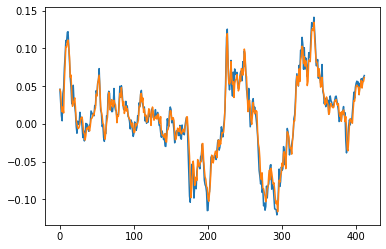

In [81]:
plot_results_points(predictions3,y_test)